In [1]:
import mitsuba as mi 
from matplotlib import pyplot as plt
mi.set_variant("cuda_ad_rgb")
import drjit as dr
from PDE3D.BoundaryShape import *
from PDE3D import PATH
from PDE3D.utils import *
from PDE3D.Solver import *


In [2]:
vis_conf = 1
resolution = [512,512]
spp = 512
def boundary_generator(points, params):
    return params["ramp_x"] * points.x
boundary_p1 = {}
boundary_p1["ramp_x"] = 0.2
boundary_p2 = {}
boundary_p2["ramp_x"] = -0.2
b1 = FunctionCoefficient("boundary", boundary_p1, boundary_generator)
b2 = FunctionCoefficient("boundary", boundary_p2, boundary_generator)

In [3]:
shape = Sphere(radius = 1, dirichlet = [b1, b2])
data_holder = DataHolder(shape = shape)

In [4]:
wos = WosConstant(data_holder)
slice = Slice(offset=0.6)
points, film_points = slice.create_slice_points(resolution, spp)
L, p = wos.solve(points_in= points, conf_numbers= [mi.UInt32(0), mi.UInt32(1)])

In [5]:
image, _ =create_slice_from_result(L, resolution)

16777216
[-0.15956231951713562, 0.1595361828804016]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01555616..1.605015].


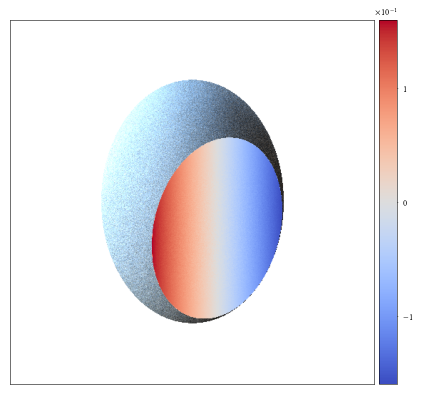

In [6]:
cmap= "coolwarm"
cam_origin = mi.ScalarPoint3f([-1.0,1.0,2])
image3D, norm = shape.visualize(slice = slice, slice_image = mi.TensorXf(image[vis_conf]), colormap = cmap, cam_origin= cam_origin, image_res=[512, 512], scale_cam = 0.5)
fig, ax = plt.subplots(1,1,figsize = (5,5))
plot_image_3D(image3D, ax, norm = norm, cmap = cmap)
